In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ply
import os


In [3]:
os.listdir(r'/home/yeat/Documents/coding/py/pda_uber_basic_analysis/data/9 - Uber/Datasets/')

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [22]:
uber_15 = pd.read_csv(r'/home/yeat/Documents/coding/py/pda_uber_basic_analysis/data/9 - Uber/Datasets/uber-raw-data-janjune-15.csv')
uber_15.shape

(14270479, 4)

In [23]:
uber_15.duplicated().sum()

np.int64(898225)

In [24]:
uber_15.drop_duplicates(inplace=True)

In [25]:
uber_15.duplicated().sum()

np.int64(0)

In [26]:
uber_15.shape

(13372254, 4)

In [9]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [10]:
uber_15.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     160702
locationID                   0
dtype: int64

In [11]:
uber_15['Pickup_date']

0           2015-05-17 09:47:00
1           2015-05-17 09:47:00
2           2015-05-17 09:47:00
3           2015-05-17 09:47:00
4           2015-05-17 09:47:00
                   ...         
14270474    2015-05-08 15:43:00
14270475    2015-05-08 15:43:00
14270476    2015-05-08 15:43:00
14270477    2015-05-08 15:44:00
14270478    2015-05-08 15:44:00
Name: Pickup_date, Length: 13372254, dtype: object

In [12]:
type(uber_15['Pickup_date'][0])

str

In [27]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [14]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [15]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
uber_15['Pickup_date'].dtype 

dtype('<M8[ns]')

## 12 Analysing which month have max Uber pickups

In [28]:
uber_15['Pickup_date'].dt.month

0           5
1           5
2           5
3           5
4           5
           ..
14270474    5
14270475    5
14270476    5
14270477    5
14270478    5
Name: Pickup_date, Length: 13372254, dtype: int32

In [29]:
uber_15['Pickup_date'].dt.month_name()

0           May
1           May
2           May
3           May
4           May
           ... 
14270474    May
14270475    May
14270476    May
14270477    May
14270478    May
Name: Pickup_date, Length: 13372254, dtype: object

In [30]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')

In [32]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

<Axes: xlabel='month'>

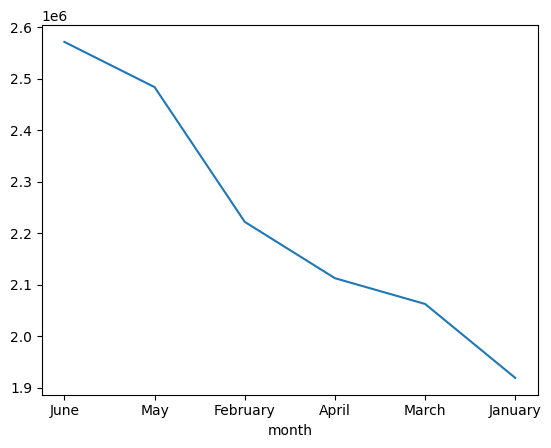

In [33]:
uber_15['month'].value_counts().plot()

<Axes: xlabel='month'>

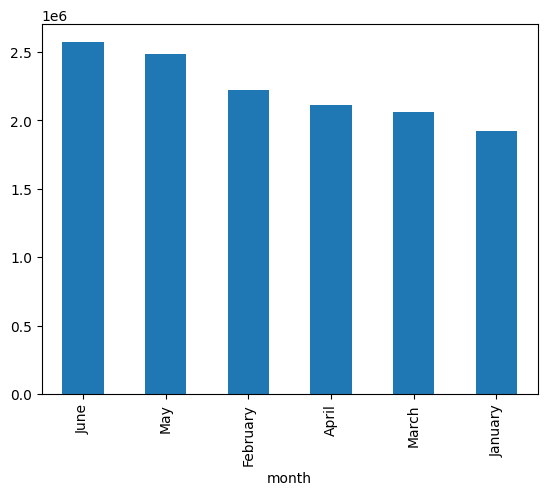

In [34]:
uber_15['month'].value_counts().plot(kind='bar')

In [35]:
uber_15['Pickup_date'].dt.day_name()

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
             ...  
14270474    Friday
14270475    Friday
14270476    Friday
14270477    Friday
14270478    Friday
Name: Pickup_date, Length: 13372254, dtype: object

In [36]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute


In [37]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,17,9,47


In [ ]:
pivot = pd.crosstab(index = uber_15['month'], columns = uber_15['weekday'])

In [ ]:
pivot

In [ ]:
pivot.plot(kind='bar')

In [ ]:
pivot.plot(kind='bar', figsize=(8,6))

In [ ]:
## 13 - Analysing Hourly Rush in New york.mp4

In [38]:
summary = uber_15.groupby(['weekday', 'hour'], as_index=False).size()
summary

,weekday,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049
...,...,...,...
163,Wednesday,19,131317
164,Wednesday,20,123490
165,Wednesday,21,120941
166,Wednesday,22,115208


<Axes: xlabel='hour', ylabel='size'>

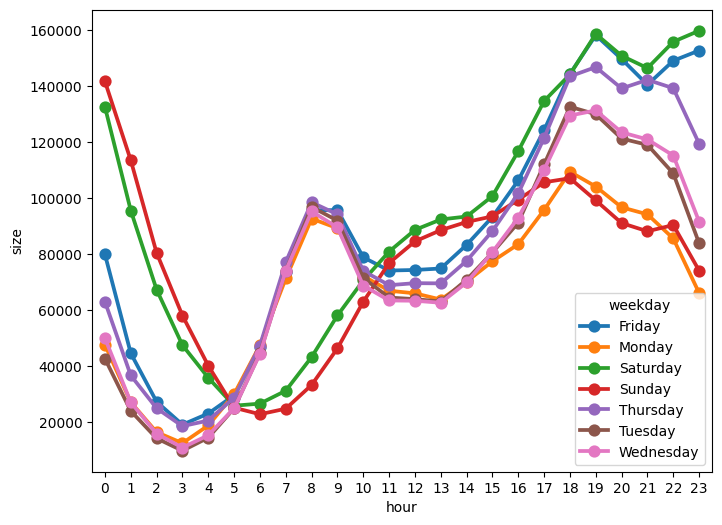

In [43]:
ply.figure(figsize=(8,6))
sns.pointplot(x="hour", y="size", hue="weekday", data=summary)